<a href="https://colab.research.google.com/github/PrakashRanjanShrivastava/Tele_Customer_Churn/blob/main/Tele_coustomer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import scipy.stats  as stats
import io

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick

In [3]:
from google.colab import files
Data_to_load = files.upload()


Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [4]:
df_tele = pd.read_csv(io.BytesIO(Data_to_load["Telco-Customer-Churn.csv"]))

In [5]:
df_tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df_tele.shape

(7043, 21)

In [7]:
df_tele.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

###Total Chagres Are in Object data Type So, Convert it in to Numeric Data type

In [8]:
df_tele['TotalCharges'] =pd.to_numeric(df_tele['TotalCharges'] , errors ='coerce')

In [9]:
df_tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df_tele.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df_tele.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Seperating the Numerical Features from Categorical Features

In [12]:
from numpy.core.multiarray import dtype
df_num  = [feature for feature in df_tele.columns if df_tele[feature].dtypes != 'O']
print(f'Count of Numerical feature: {len(df_num)}')
print(f'Numerical feature are:\n {df_num}')

Count of Numerical feature: 4
Numerical feature are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [13]:
df_cat = {feature for feature in df_tele.columns if df_tele[feature].dtypes == "O"}
print(f'count of categorical feature:{len(df_cat)}')
print(f'Categorical feature are:\n {df_cat}')


count of categorical feature:17
Categorical feature are:
 {'StreamingMovies', 'gender', 'PaperlessBilling', 'InternetService', 'DeviceProtection', 'customerID', 'Dependents', 'TechSupport', 'OnlineBackup', 'PhoneService', 'StreamingTV', 'Churn', 'MultipleLines', 'OnlineSecurity', 'Contract', 'PaymentMethod', 'Partner'}


#EDA

Plotting with the target feature

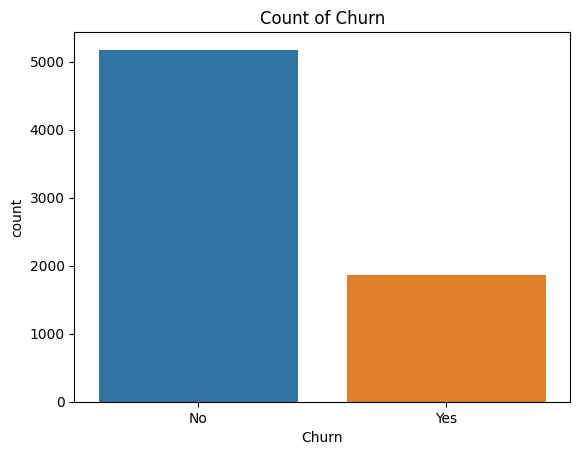

In [14]:
sns.countplot(data = df_tele, x = "Churn")
plt.title('Count of Churn')
plt.show()

In [15]:
l1 = df_tele.loc[df_tele['Churn']== 'Yes'].count()[0]
print(f"Pecentage of Left: {l1/len(df_tele['Churn'])}")
print(df_tele.Churn.value_counts())

Pecentage of Left: 0.2653698707936959
No     5174
Yes    1869
Name: Churn, dtype: int64


In [16]:
loss = []
for values in df_tele.loc[df_tele['Churn'] == "Yes", "TotalCharges"]:
  values = float(values)
  loss.append(values)
print(np.round(sum(loss)))


2862927.0


By Above Calculations we can say that we have lost around $2862927 due to customer churn .

###Plotting Numerical Features with Probability distributions and checking  for outlier through box plots

In [17]:
import scipy.stats as stats


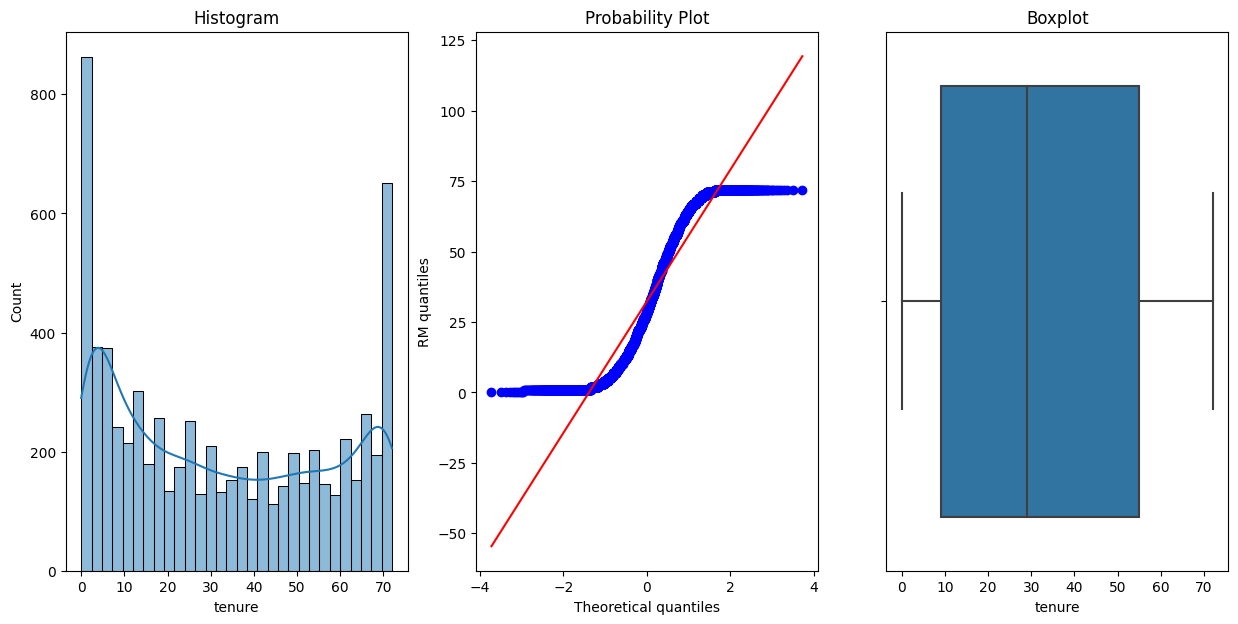

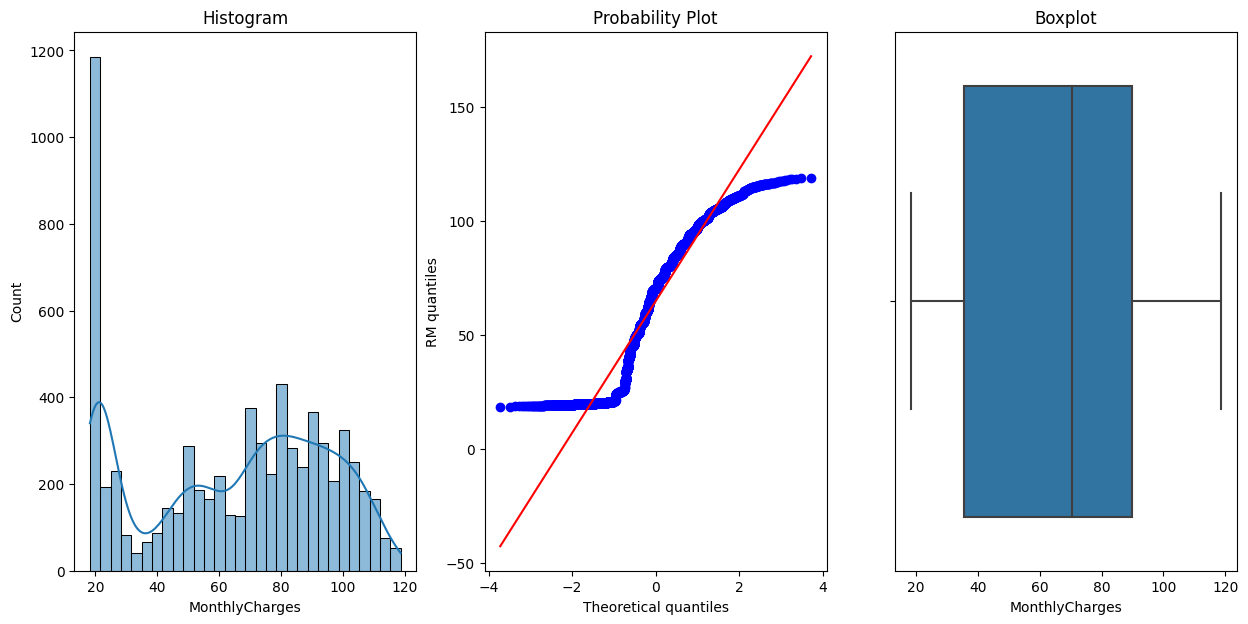

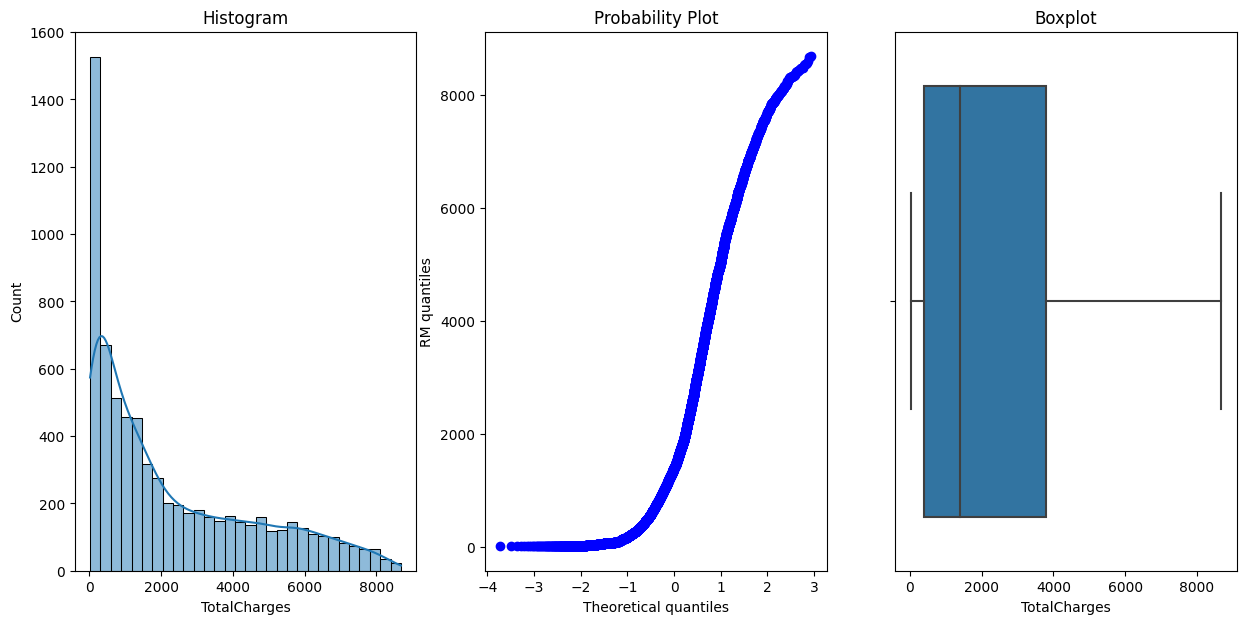

In [18]:
for feature in df_num:
  if feature != "SeniorCitizen":
    plt.figure(figsize=(15,7))

    plt.subplot(1,3,1)
    sns.histplot(data = df_tele, x=feature, bins =30 , kde =True)
    plt.title("Histogram")

    plt.subplot(1,3,2)
    stats.probplot(df_tele[feature], dist ="norm", plot = plt)
    plt.ylabel('RM quantiles')

    plt.subplot(1,3,3)
    sns.boxplot(x=df_tele[feature])
    plt.title('Boxplot')

plt.show()



All numerical Features are almost normally distributed And have no outliers

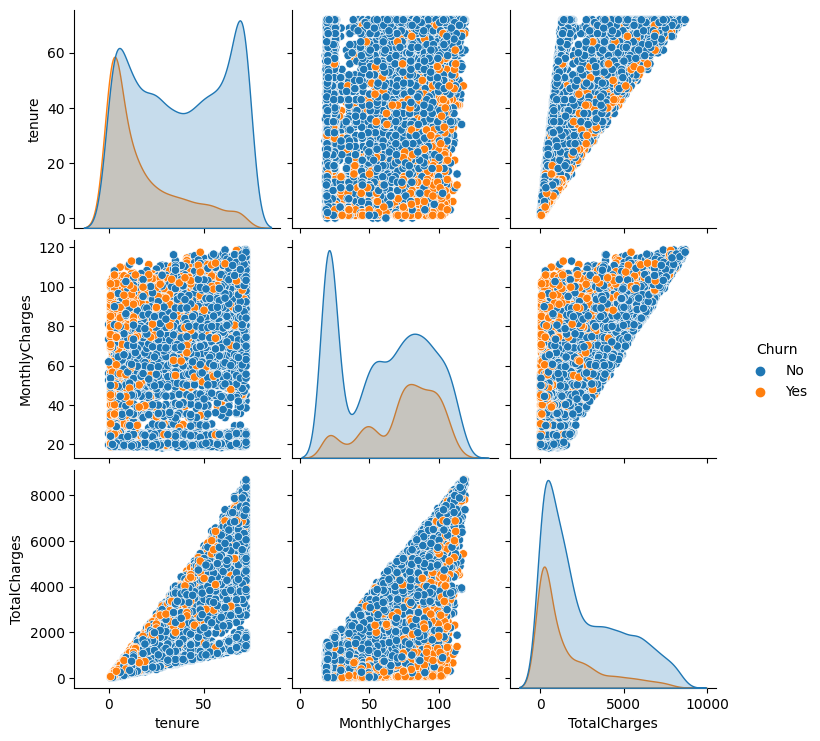

In [20]:


sns.pairplot(df_tele.drop(columns='SeniorCitizen'),hue='Churn', kind='scatter')
plt.show()

Text(0.5, 1.0, '% of Senior Citizens')

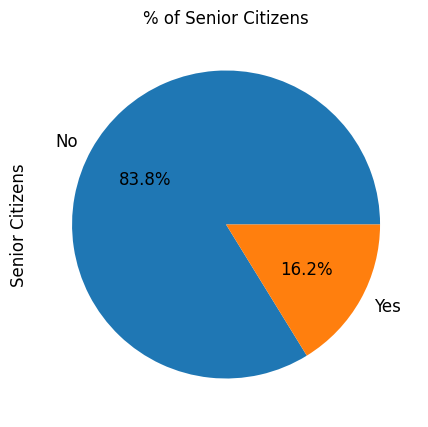

In [22]:
# pie chart for Count of Senior citizens
ax = (df_tele['SeniorCitizen'].value_counts()*100.0 /len(df_tele)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Only 16.2% customers who are senior citizons but remaining 83.8% customers are young people

###Univariate Analysis of Categorical Features

<Figure size 640x480 with 0 Axes>

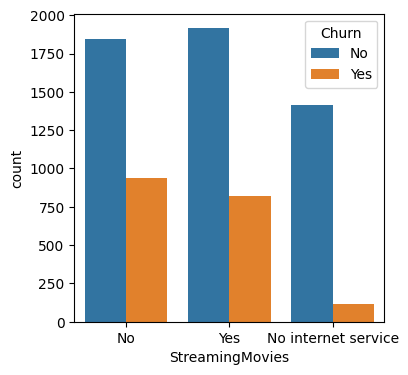

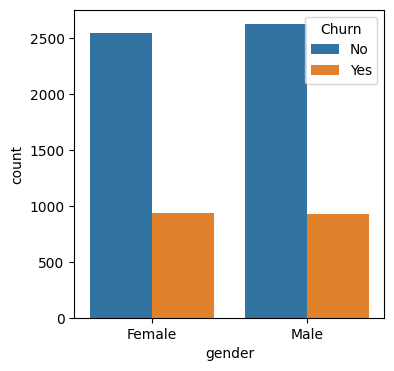

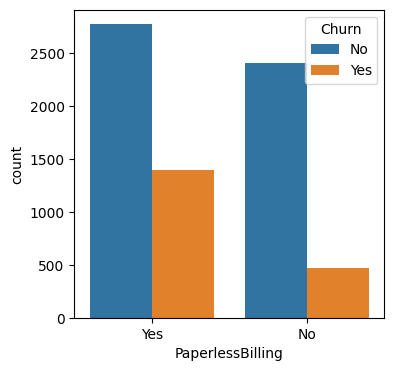

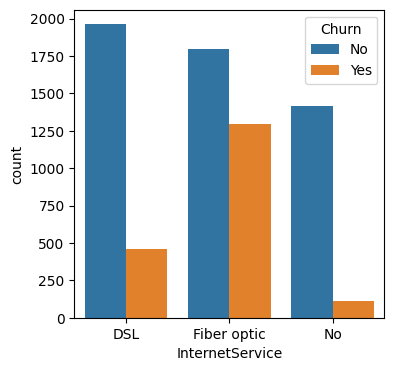

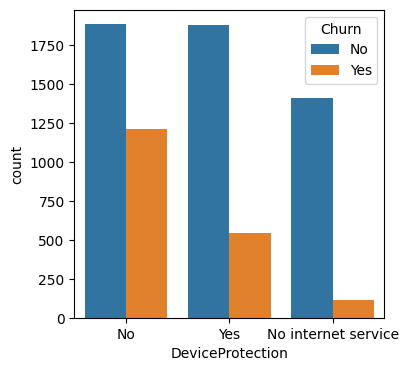

<Figure size 640x480 with 0 Axes>

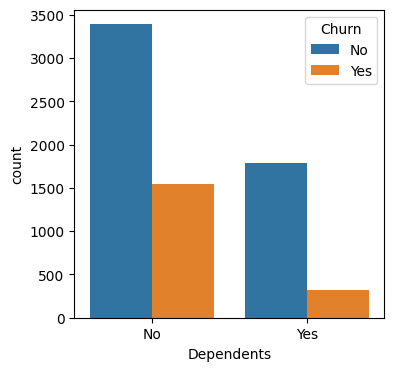

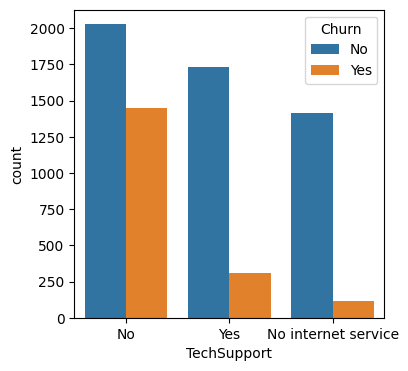

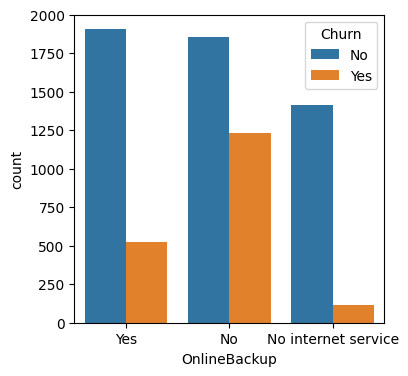

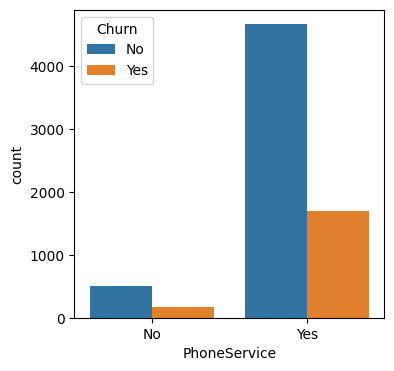

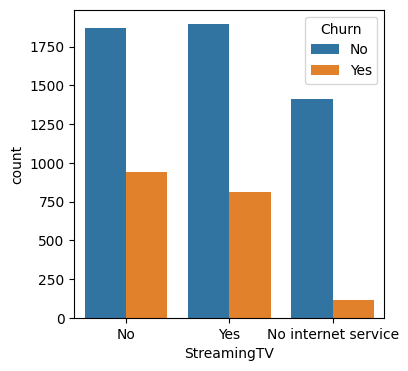

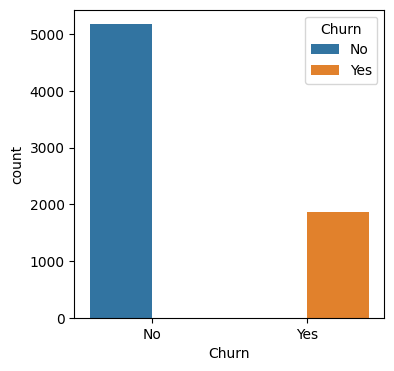

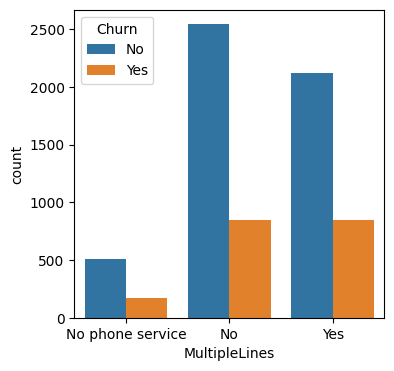

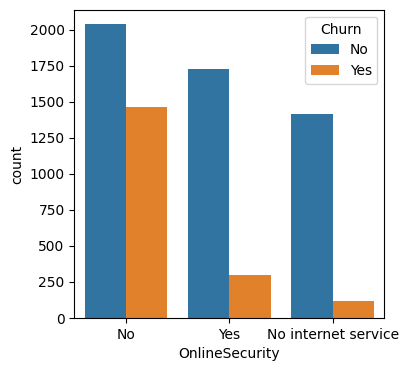

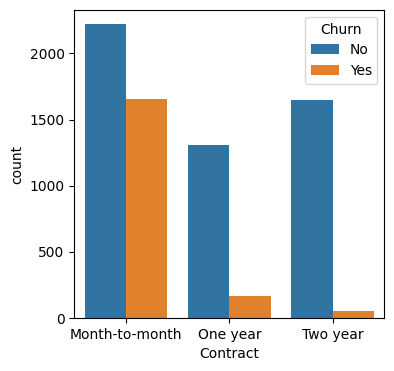

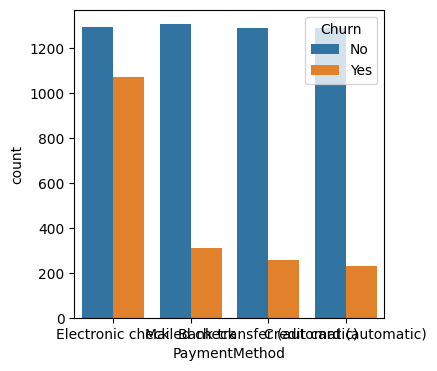

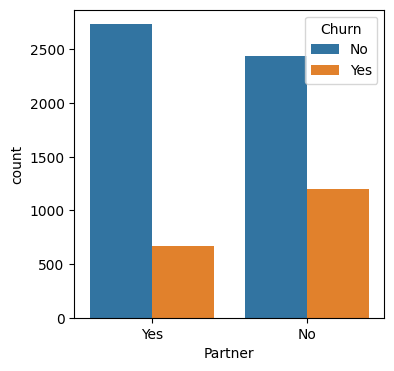

In [31]:
for i, feature in enumerate(df_cat):
  if feature != "customerID":
    if feature != "TotalCharges":
      plt.figure(i)
      plt.figure(figsize=(4,4))
      sns.countplot(data =df_tele, x= feature, hue ="Churn")

plt.show()

####Data Cleaning:

In [32]:
df_tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
df_tele.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We need to replace the null values with mean value

In [34]:
df_tele.TotalCharges = df_tele.TotalCharges.fillna(df_tele.TotalCharges.median())

<Axes: >

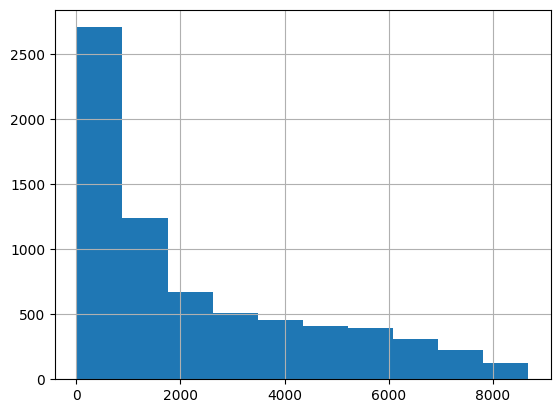

In [35]:
df_tele.TotalCharges.hist()

In [37]:
df_tele.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from collections import Counter

Now We have convert the categorical Feature in Numerical Feature

In [38]:
print(df_cat)

{'StreamingMovies', 'gender', 'PaperlessBilling', 'InternetService', 'DeviceProtection', 'customerID', 'Dependents', 'TechSupport', 'OnlineBackup', 'PhoneService', 'StreamingTV', 'Churn', 'MultipleLines', 'OnlineSecurity', 'Contract', 'PaymentMethod', 'Partner'}


In [40]:
encoder = LabelEncoder()
for feature in df_cat:
    df_tele[feature] = encoder.fit_transform(df_tele[feature])

In [41]:
df_tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [42]:
df_tele.drop(columns=['customerID'], inplace=True)

<Axes: >

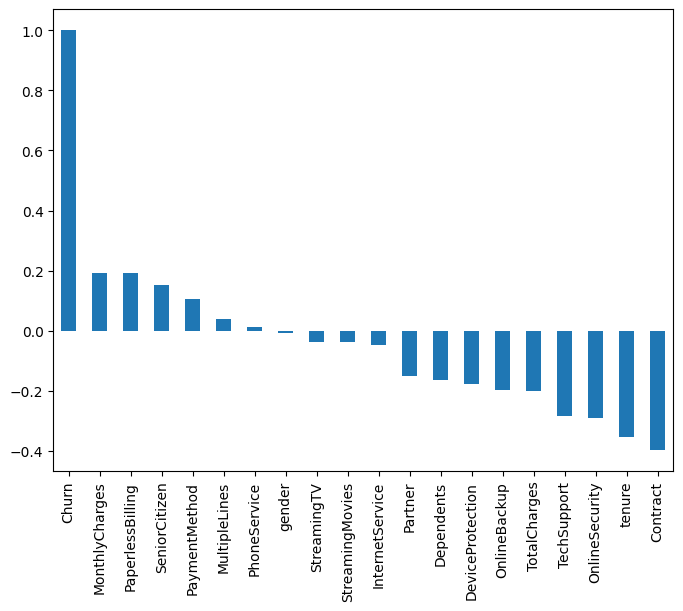

In [45]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(8,6))
df_tele.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

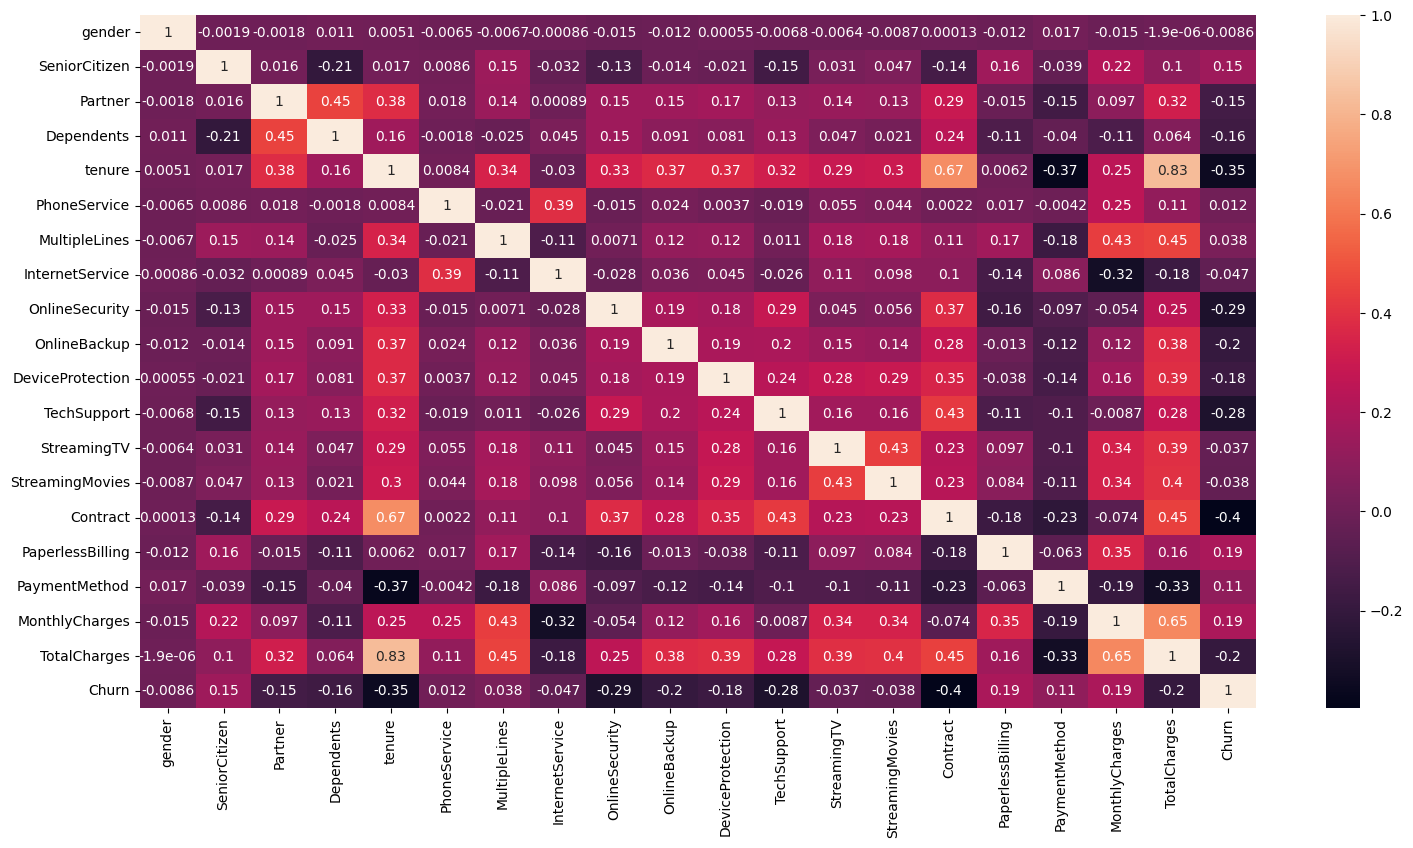

In [51]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(18,9))
sns.heatmap(df_tele.corr(), annot=True)

As I will use Ensemble Methods for Model Building so, there is no need of Feature Scaling

Now  First I will Do Feature Selection Using SelectKBest

In [52]:
# splitting dataset into dependent and independent feature
X = df_tele.drop(columns='Churn')
y = df_tele['Churn']

In [53]:
# selects the feature which has more correlation
selection = SelectKBest()  # k=10 default
X = selection.fit_transform(X,y)

In [57]:
#  this will shows which feature are taken denote as True other are removed like false
selection.get_support()

array([False, False, False,  True,  True, False, False, False,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True])

According to the feature selection, we selects the 10 out of 21 features. these are the 10 features are selected [Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, TotalCharges]



In [58]:
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
X_train.shape

(5634, 10)

In [60]:
X_test.shape

(1409, 10)

In [61]:
# its an imbalance dataset
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

###Applying machine learning algorithm:

In [62]:
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.8211497515968772
Confusion matrix :
 [[945 139]
 [113 212]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1084
           1       0.60      0.65      0.63       325

    accuracy                           0.82      1409
   macro avg       0.75      0.76      0.75      1409
weighted avg       0.83      0.82      0.82      1409



In [63]:
# Random forest classifier
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.830376153300213
Confusion matrix :
 [[975 156]
 [ 83 195]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      1131
           1       0.56      0.70      0.62       278

    accuracy                           0.83      1409
   macro avg       0.74      0.78      0.76      1409
weighted avg       0.85      0.83      0.84      1409



In [64]:
# decisionTree Classifier
Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.8133427963094393
Confusion matrix :
 [[953 158]
 [105 193]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1111
           1       0.55      0.65      0.59       298

    accuracy                           0.81      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.83      0.81      0.82      1409



As we compare to the imbalance dataset our model are perform like okay not a better model to build for end to end project. So we need to over smpling data for reducing the TN, FN and increase the FP and TP for model building

**Using SMOTEENN for imbalance dataset:**


 Over-sampling using SMOTE and cleaning using ENN. Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours

In [65]:
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 4116, 1: 1518})
The number of classes after fit Counter({1: 2456, 0: 2123})


In [66]:
# splitting the over sampling dataset
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.2)

In [67]:
# decisionTree Classifier
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9235807860262009
Confusion matrix :
 [[391  23]
 [ 47 455]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       414
           1       0.95      0.91      0.93       502

    accuracy                           0.92       916
   macro avg       0.92      0.93      0.92       916
weighted avg       0.93      0.92      0.92       916



In [68]:
# Random forest classifier
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9334061135371179
Confusion matrix :
 [[398  21]
 [ 40 457]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       419
           1       0.96      0.92      0.94       497

    accuracy                           0.93       916
   macro avg       0.93      0.93      0.93       916
weighted avg       0.93      0.93      0.93       916



In [69]:
# logistic regression
Log_reg_sampling = LogisticRegression(C=10, max_iter=150)
Log_reg_sampling.fit(X_train_sap, y_train_sap)
Log_sampling_pred = Log_reg_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test_sap)}')

Accuracy score : 0.9050218340611353
Confusion matrix :
 [[391  40]
 [ 47 438]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       431
           1       0.92      0.90      0.91       485

    accuracy                           0.91       916
   macro avg       0.90      0.91      0.90       916
weighted avg       0.91      0.91      0.91       916



In [70]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9465065502183406
Confusion matrix :
 [[408  19]
 [ 30 459]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       427
           1       0.96      0.94      0.95       489

    accuracy                           0.95       916
   macro avg       0.95      0.95      0.95       916
weighted avg       0.95      0.95      0.95       916



After using SMOOTEENN methods to perform over sampling and down sampling with edited nearest neighbours. From this results we get bet accuraccy and TP FP ratio also increases in GradientBoostClassifier so perform HyperParameter Tunning for this model only

In [71]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }

In [72]:
gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
gbc_optm.fit(X_train_sap, y_train_sap)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=mae, learning_rate=0.05, loss=exponential, max_depth=11, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=9, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=mae, learning_rate=0.05, loss=exponential, max_depth=11, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=9, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, learning_rate=0.05, loss=exponential, max_depth=11, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=9, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, learning_rate=0.05, loss=exponential, max_depth=11, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=9, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, learning_rate=0.05, loss=exponential, max_depth=11, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=9, n_estimators=250;, score=nan total time=   0.

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_leaf_nodes': [3, 6, 8, 9, 12, 15,
                                                           18, 24],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   verbose=3)

In [73]:
gbc_optm.best_estimator_

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.5,
                           loss='exponential', max_depth=9, max_leaf_nodes=12,
                           min_samples_leaf=11, min_samples_split=4,
                           n_estimators=250)

In [78]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=19, max_leaf_nodes=24, min_samples_leaf=9,
                           min_samples_split=7, n_estimators=150)
gbc_tunning.fit(X_train_sap, y_train_sap)
pred = gbc_tunning.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9770742358078602
Confusion matrix :
 [[426   9]
 [ 12 469]]
Classification report :
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       435
           1       0.98      0.98      0.98       481

    accuracy                           0.98       916
   macro avg       0.98      0.98      0.98       916
weighted avg       0.98      0.98      0.98       916



After Oversampling the dataset our model performs is pretty good. From our 4 model GradientBoostClassifier performs better than all. So we dumb our model using pickle library

###Model Saving:

In [79]:
import pickle

In [80]:
filename = 'Model.sav'
pickle.dump(gbc_tunning, open(filename,'wb'))

In [81]:
load_model = pickle.load(open(filename, 'rb'))

In [82]:
load_model.score(X_test_sap, y_test_sap)

0.9770742358078602

In [83]:
Dependents = 'Yes'
tenure = 1
OnlineSecurity = 'No'
OnlineBackup = 'Yes'
DeviceProtection = 'No'
TechSupport = 'No'
Contract = 'Month-to-month'
PaperlessBilling = 'No'
MonthlyCharges = 29.85
TotalCharges = 556.85

In [85]:
data = [[Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, TotalCharges]]

In [86]:
df = pd.DataFrame(data, columns=['Dependents', 'tenure', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
        'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'])
df.head()
print(df.dtypes)

Dependents           object
tenure                int64
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [87]:
for feature in df.columns:
    if df[feature].dtypes == 'O':
        categorical_feature = feature
        print(categorical_feature)

Dependents
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
Contract
PaperlessBilling


In [88]:
encoder = LabelEncoder()
for feature in df.columns:
    if df[feature].dtypes == 'O':
        df[feature] = encoder.fit_transform(df[feature])

In [89]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,1,0,0,0,0,0,0,29.85,556.85


In [90]:
single = load_model.predict(df)
probability = load_model.predict_proba(df)[:,1]

In [91]:
print(single)

[1]


In [92]:
print(probability)

[0.99268979]


In [93]:
if single == 1:
    print("This Customer is likely to be Churned!")
    print(f"Confidence level is {np.round(probability*100, 2)}")
else:
    print("This Customer is likely to be Continue!")
    print(f"Confidence level is {np.round(probability*100, 2)}")

This Customer is likely to be Churned!
Confidence level is [99.27]
